# Task 1: Classification

- define a Neural Network
- def

In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Dataset

In [105]:
transform=transforms.Compose([
        transforms.ToTensor()])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)


idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


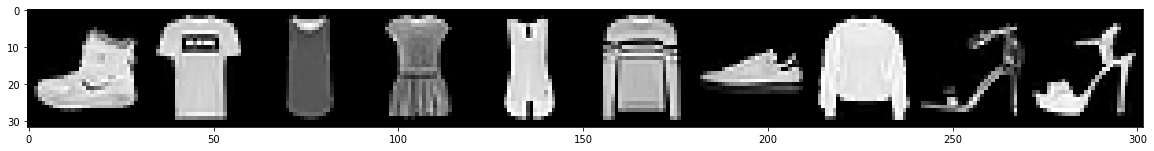

In [106]:
x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

In [107]:
# use cuda if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [114]:
# class defining neural network
# input layer is linear, takes 28*28 input parameters, outputs 512 uses ReLU
# 1 hidden layer input 512, output 512 uses ReLU()
# output layer, input 512, output 10, one for each class, uses ReLU()
# ReLU is widely used as it solves the problem of vanishing gradients
# nn uses bias term throughout network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We also tested some other activation functions such as sigmoid for the output layer, however, we achieved better results just using ReLU

In [115]:
# obtain and print the model
# execute model on device --> cuda if available
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [123]:
# function for training
# @param dataloader: the data loader for the training set
# @param model: the previously defined neural network model
# @param loss_fn: defined loss function
# @param optimizer: how we calculate the loss
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # move X to gpu if available
        X = X.to(device)
        y = y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# function for testing
# @param dataloader: the data loader for the training set
# @param model: the previously defined neural network model after training
# @param loss_fn: defined loss function
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # move X to gpu if available
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [113]:
# define hyper params
# updating rate for each batch/epoch
learning_rate = 1e-3
# number of data samples to propagate through network before updating params
batch_size = 64
# iteration times
epochs = 10
# using CrossEntropy for numeric stability, combines LogSoftmax and NLLLoss
# useful when training a problem with C classes
loss_fn = nn.CrossEntropyLoss()
# defining the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# use data loader to obtain batch training and test data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 20, shuffle=True)


for t in range(epochs):
    print(f"EpocKLDivLossh {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("Done!")

EpocKLDivLossh 1
-------------------------------
torch.Size([20, 1, 28, 28])
torch.Size([20])
loss: 1.680676  [    0/60000]
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
loss: 1.421096  [14000/60000]
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
loss: 1.270641  [36000/60000]
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size

# Task 2: 

In [117]:
train_dataset = NoisyFashionMNIST("./data", True)
test_dataset = NoisyFashionMNIST("./data", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


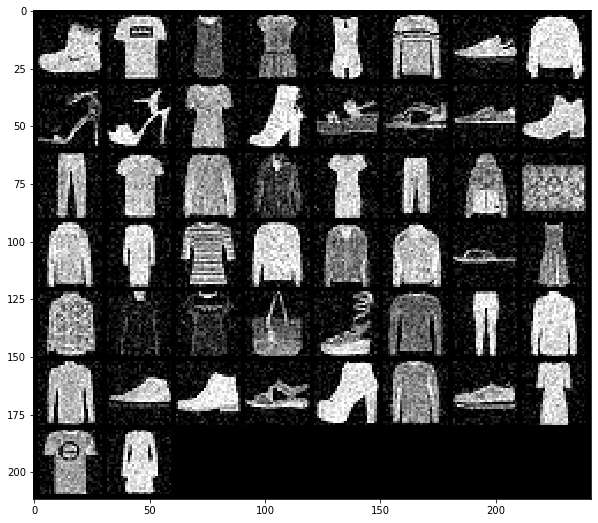

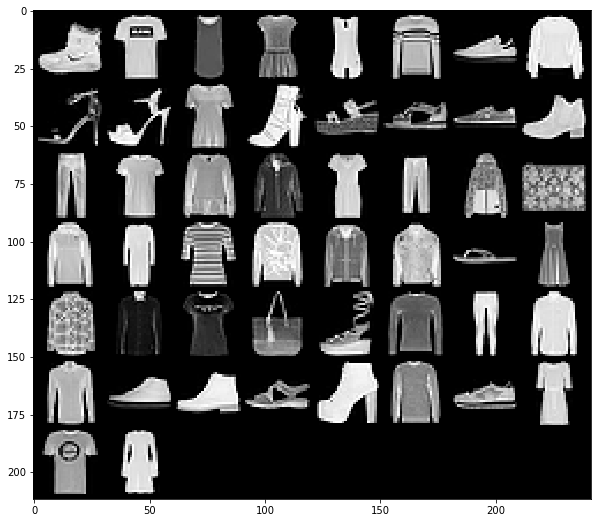

In [118]:
x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.show()

In [130]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Linear(in_features=28, out_features=256)
        self.enc2 = nn.Linear(in_features=256, out_features=128)
        self.enc3 = nn.Linear(in_features=128, out_features=64)
        self.enc4 = nn.Linear(in_features=64, out_features=32)
        self.enc5 = nn.Linear(in_features=32, out_features=16)
        # decoder 
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec3 = nn.Linear(in_features=64, out_features=128)
        self.dec4 = nn.Linear(in_features=128, out_features=256)
        self.dec5 = nn.Linear(in_features=256, out_features=28)
        
    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x
    
model = Autoencoder()
model.to(device)
print(model)

Autoencoder(
  (enc1): Linear(in_features=28, out_features=256, bias=True)
  (enc2): Linear(in_features=256, out_features=128, bias=True)
  (enc3): Linear(in_features=128, out_features=64, bias=True)
  (enc4): Linear(in_features=64, out_features=32, bias=True)
  (enc5): Linear(in_features=32, out_features=16, bias=True)
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=28, bias=True)
)


In [131]:
# define hyper params
# updating rate for each batch/epoch
learning_rate = 1e-3
# number of data samples to propagate through network before updating params
batch_size = 64
# iteration times
epochs = 10
# using CrossEntropy for numeric stability, combines LogSoftmax and NLLLoss
# useful when training a problem with C classes
loss_fn = nn.KLDivLoss()
# defining the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# use data loader to obtain batch training and test data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 20, shuffle=True)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: -0.103497  [    0/60000]
loss: -0.120071  [ 2000/60000]
loss: -0.128498  [ 4000/60000]
loss: -0.111318  [ 6000/60000]
loss: -0.137888  [ 8000/60000]
loss: -0.152025  [10000/60000]
loss: -0.130272  [12000/60000]
loss: -0.110537  [14000/60000]
loss: -0.142316  [16000/60000]
loss: -0.148231  [18000/60000]
loss: -0.123945  [20000/60000]
loss: -0.112548  [22000/60000]
loss: -0.102197  [24000/60000]
loss: -0.135619  [26000/60000]
loss: -0.104684  [28000/60000]
loss: -0.138718  [30000/60000]
loss: -0.140899  [32000/60000]
loss: -0.126409  [34000/60000]
loss: -0.138936  [36000/60000]
loss: -0.134612  [38000/60000]
loss: -0.124943  [40000/60000]
loss: -0.138141  [42000/60000]
loss: -0.134761  [44000/60000]
loss: -0.127565  [46000/60000]
loss: -0.137769  [48000/60000]
loss: -0.149116  [50000/60000]
loss: -0.134632  [52000/60000]
loss: -0.139892  [54000/60000]
loss: -0.119712  [56000/60000]
loss: -0.139434  [58000/60000]
Test Error: 
 Accuracy: 783836